In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

from scroutines import powerplots

In [2]:
outdir = "/data/qlyu/v1/results_merfish/plots_230621"
outdatadir = "/data/qlyu/v1/results_merfish"
!mkdir -p $outdir

In [3]:
f1 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region0/cell_by_gene.csv'
f2 = '/data/qlyu/v1/data/merfish/merfish_06142023/ant/region0/cell_metadata.csv'
output = outdatadir + '/ant_reg0_230719.h5ad'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)

df1.shape, df2.shape

((339963, 551), (339963, 17))

In [4]:
genes = df1.iloc[:,1:-50].columns
blnks = df1.iloc[:, -50:].columns
df = df2.join(df1)
assert np.all(df['cell'] == df['EntityID'])
len(genes), len(blnks)

(500, 50)

In [5]:
# sns.histplot(df2['volume'], cumulative=True, element='step')

In [6]:
# sns.histplot(df1[blnks].sum(axis=1), cumulative=True, element='step')

<Axes: xlabel='gncov', ylabel='Count'>

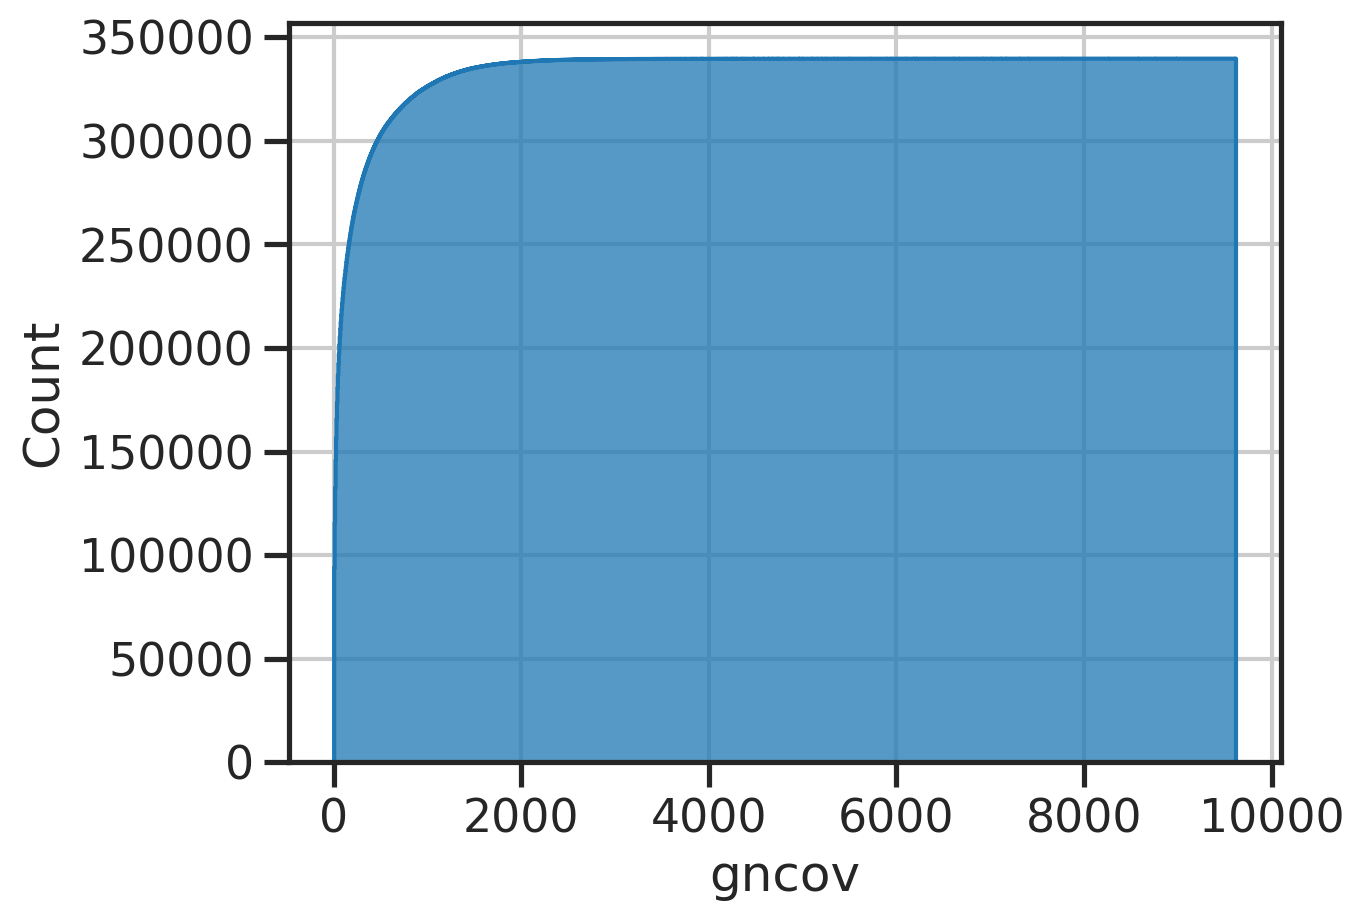

In [7]:
df['fpcov'] = df[blnks].sum(axis=1)
df['gncov'] = df[genes].sum(axis=1)
sns.histplot(df['gncov'], cumulative=True, element='step')

In [8]:
print(df.shape)
cond = np.all([
    df['volume'] < 5000, 
    df['fpcov'] < 5,
    df['gncov'] > 10,
], axis=0)

df = df[cond] 
print(df.shape)

(339963, 570)
(197297, 570)


In [9]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
    """ rotate data points defined by `x` and `y` by `theta` degree
    """
    a = np.vstack([x,y]).T
    if unit == 'degree':
        theta = theta*np.pi/180 # convert to radian

    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    ar = a.dot(R.T)
    return ar[:,0], ar[:,1]

def st_scatter(x, y, gexp=None, vmax_p=98, title='', s=1, cbar_label='', output='', cmap='rocket_r', axis_off=True):
    """customized scatter plot -- yesterday's progress
    """
  
    fig, ax = plt.subplots(figsize=(10,8))
    if gexp is not None:
        vmax = np.percentile(gexp, vmax_p)
        g = ax.scatter(x, y, c=gexp, s=s, edgecolor='none', vmax=vmax, cmap=cmap, rasterized=True)
        fig.colorbar(g, label=cbar_label, shrink=0.3)
    else:
        g = ax.scatter(x, y, s=s, edgecolor='none', cmap=cmap, rasterized=True)
  
    if axis_off:
        ax.axis('off')
    ax.set_title(title)
    ax.set_aspect('equal')
  
    if output:
        powerplots.savefig_autodate(fig, output)
        
    return 

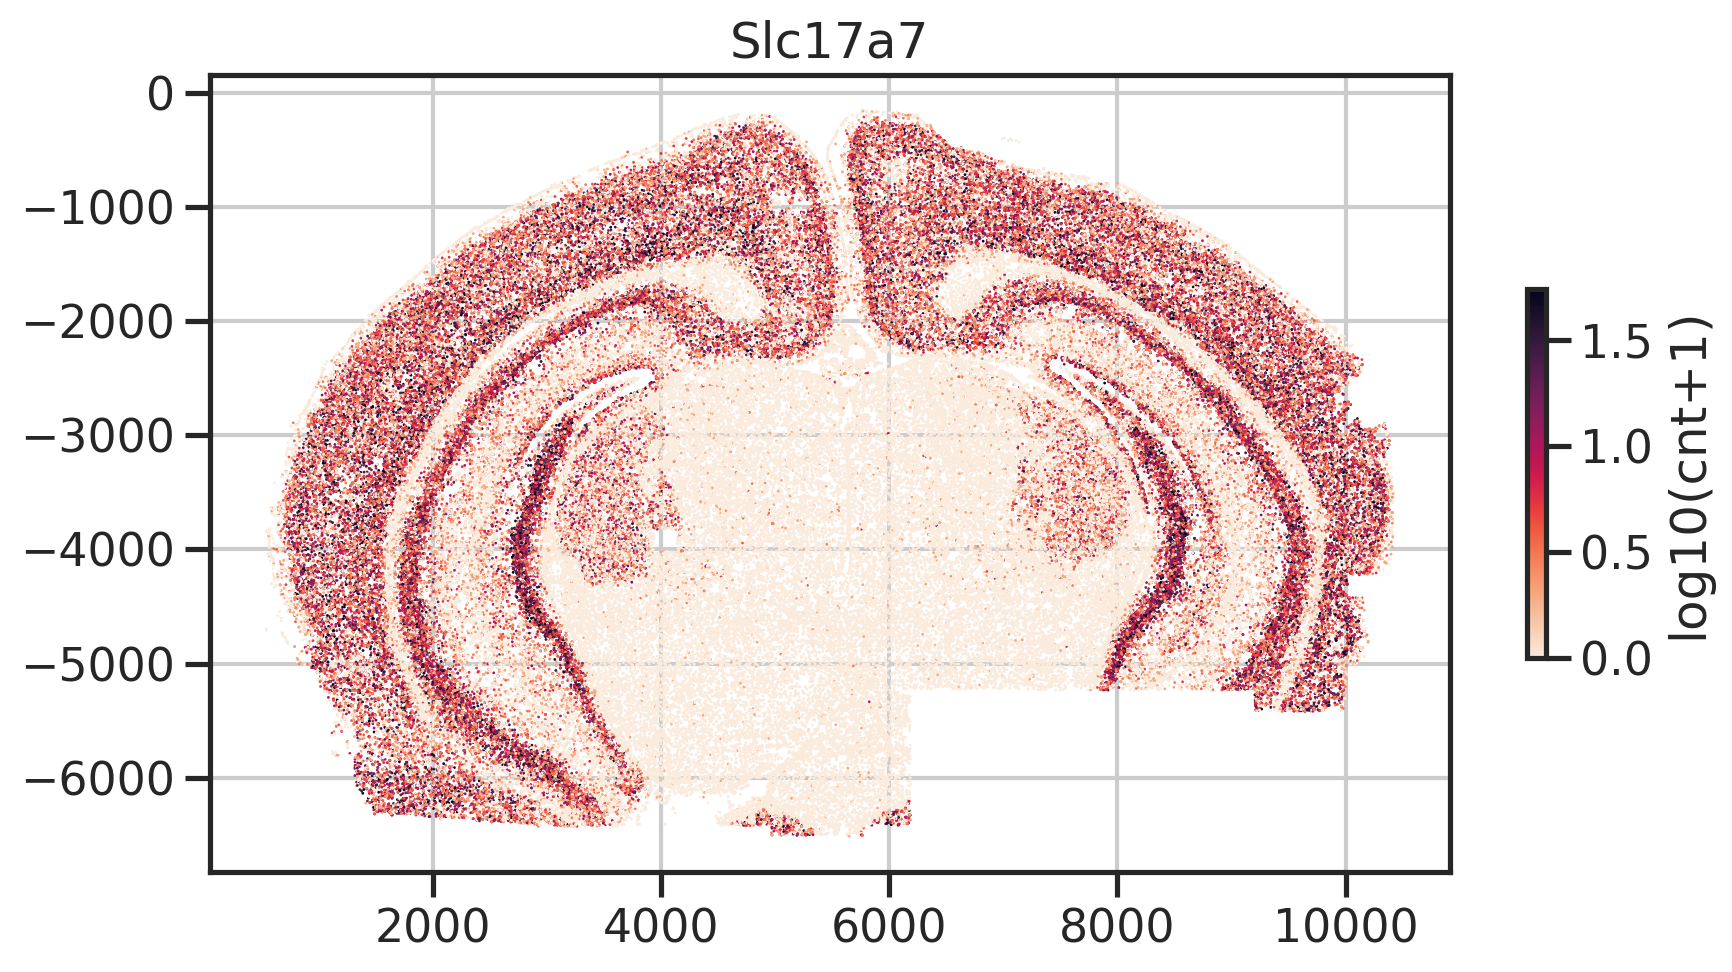

In [13]:
# calibrate coordinates

x = df['center_x']
y = df['center_y']
xr, yr = rot2d(x, y, 270)
df['x'] = xr
df['y'] = yr

gn = 'Slc17a7'
g = np.log10(1+df[gn])
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [14]:
# focus on Visual cortex
cond_region = df['y'] > -3000
dfsub = df[cond_region]

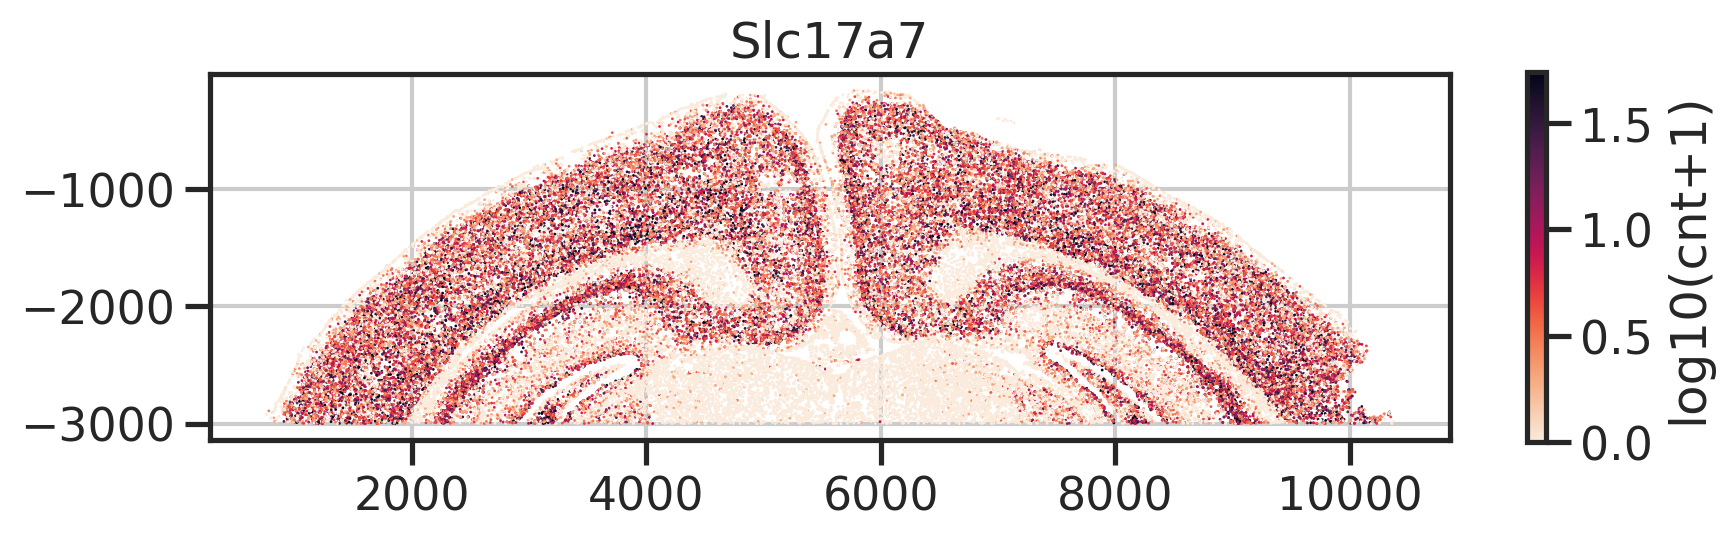

In [15]:
gn = 'Slc17a7'
g = np.log10(1+dfsub[gn])
xr = dfsub['x']
yr = dfsub['y']
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [16]:
dfsub

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,...,Blank-45,Blank-46,Blank-47,Blank-48,Blank-49,Blank-50,fpcov,gncov,x,y
687,2595481500178100001,508,209.453749,2916.520696,755.939259,2910.596043,751.648931,2920.919445,761.963592,1.320404,...,0,0,0,0,0,0,0,16,755.939259,-2916.520696
688,2595481500178100002,508,271.968972,2924.948192,761.061657,2920.926308,751.977585,2929.539197,766.849721,1.832349,...,0,0,0,0,0,0,0,34,761.061657,-2924.948192
689,2595481500178100003,508,179.715415,2956.835607,794.502069,2953.146670,791.176316,2961.830678,797.755581,1.329425,...,0,0,0,0,0,0,0,80,794.502069,-2956.835607
690,2595481500178100004,508,1455.027537,2949.398944,799.052007,2941.298598,792.328008,2957.822366,805.320198,1.274051,...,0,0,0,0,0,0,2,471,799.052007,-2949.398944
691,2595481500178100006,508,1523.075115,2899.135147,822.840183,2890.418908,810.089988,2909.119549,830.479147,1.662253,...,0,0,0,0,0,0,0,284,822.840183,-2899.135147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339387,2595481504078100022,461,108.511079,2958.429092,10294.933097,2954.982641,10289.233960,2961.926300,10298.912585,1.711442,...,0,0,0,0,0,0,0,26,10294.933097,-2958.429092
339388,2595481504078100026,461,81.680791,2912.425254,10333.751527,2906.429517,10330.204266,2918.201650,10337.455610,1.631937,...,0,0,0,0,0,0,0,41,10333.751527,-2912.425254
339390,2595481504078100028,461,209.859345,2914.154423,10334.823571,2907.185505,10330.451993,2919.495358,10340.240639,1.456042,...,0,0,0,0,0,0,0,19,10334.823571,-2914.154423
339394,2595481504079100017,461,963.757990,2978.535135,10371.740477,2972.704703,10364.279276,2983.864273,10380.129271,1.457922,...,0,0,0,0,0,0,0,65,10371.740477,-2978.535135


In [17]:
df2.columns

Index(['EntityID', 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y',
       'max_x', 'max_y', 'anisotropy', 'transcript_count',
       'perimeter_area_ratio', 'solidity', 'PolyT_raw', 'PolyT_high_pass',
       'DAPI_raw', 'DAPI_high_pass'],
      dtype='object')

In [18]:
metacols = np.hstack(['x', 'y', 'gncov', 'fpcov', df2.columns])
adata = ad.AnnData(X=dfsub[genes].values, 
                   obs=dfsub[metacols], 
                   var=pd.DataFrame(index=genes), 
                   obsm=dict(blanks=dfsub[blnks].values),
                  )

/tmp/ipykernel_1713491/4156774178.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=dfsub[genes].values,
/home/qlyu/mambaforge/envs/bbbroutine/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [19]:
adata.write(output)

In [ ]:
# for gn in genes:
#     g = np.log10(1+df[gn])
#     output = outdir + f'/{gn}.pdf'
#     print(output)
#     st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', output=output)
#     plt.close()
#     # break